In [1]:
import csv
import cv2
from sklearn.utils import shuffle

%matplotlib inline

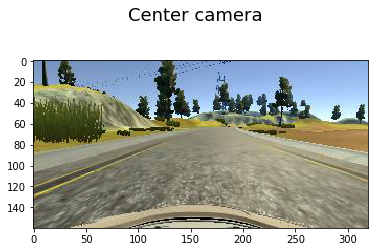

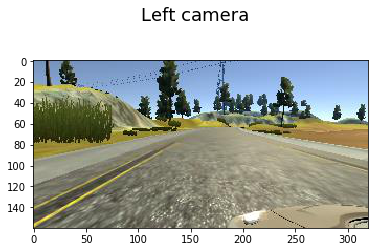

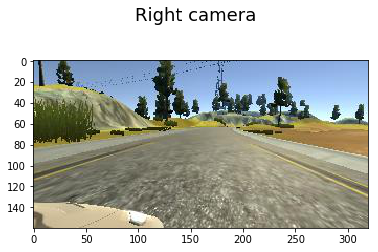

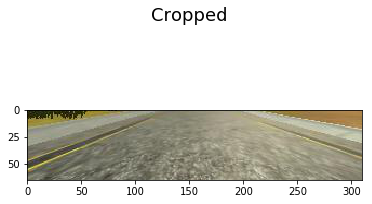

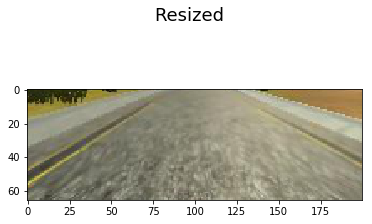

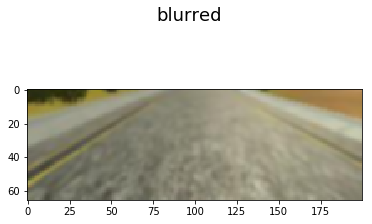

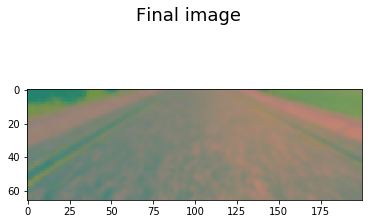

In [13]:
def plot(img, title):
    fig = plt.figure()
    fig.suptitle(title, fontsize=18)
    plt.imshow(img)
    plt.show()
    
    
def rgb(img):
      return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


samples = []
data_folder = '/Users/daard/Documents/CarND/p3/data/'
with open(data_folder + '/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)
        
line = shuffle(samples)[0]

center = rgb(cv2.imread(data_folder + line[0].strip()))
left = rgb(cv2.imread(data_folder + line[1].strip()))
right = rgb(cv2.imread(data_folder + line[2].strip()))

plot(center, "Center camera")
plot(left, "Left camera")
plot(right, "Right camera")

cropped = center[70:135,10:350]
plot(cropped, "Cropped")

resized = cv2.resize(cropped, (200, 66), interpolation=cv2.INTER_AREA)
plot(resized, "Resized")

blurred = cv2.GaussianBlur(resized, (5,5), 0)
plot(blurred, "blurred")

final_image = cv2.cvtColor(blurred, cv2.COLOR_RGB2YUV)
plot(final_image, "Final image")

## Training loss

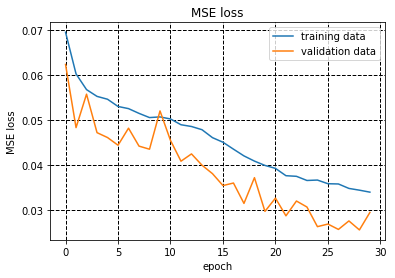

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
loss = [0.069503111583289728, 0.060257023502552902, 0.056765922930783141, 0.055263324961609732, 0.054630442273538922, 0.053026880552839113, 0.052547035382925718, 0.051493847476005168, 0.050559861499311229, 0.050705761974702793, 0.050251286797261978, 0.04896742251899882, 0.048578259692804673, 0.047867846325907813, 0.046102011855133997, 0.045083790652506624, 0.043546181636526328, 0.042050500639152062, 0.040894788047567486, 0.039937813672509349, 0.039281644847773314, 0.037654984511220076, 0.037518399135373373, 0.036596266600462037, 0.036688353715258637, 0.0358739294716049, 0.03582006434833445, 0.034831004836796804, 0.034443419333395259, 0.034003427024032348]
valid_loss = [0.062352443090601985, 0.048329730809675849, 0.05575396214238184, 0.047211714399188642, 0.046127221963297889, 0.044423642631662756, 0.048206576443782762, 0.044222728642809954, 0.043536947872824298, 0.052038274964983852, 0.045483862317056194, 0.040873626359597973, 0.042492919173101787, 0.039990840333721273, 0.038107166775524066, 0.035466514645417099, 0.036028741725563806, 0.031506506232347055, 0.037219930523332202, 0.029738302836899336, 0.032677625027618527, 0.028749112848944811, 0.032034858878728291, 0.030705211415408291, 0.026344768513373272, 0.026919811122447949, 0.025730758224029416, 0.027613928408712296, 0.025619383539373809, 0.029508480361105635] 
plt.plot(loss)
plt.plot(valid_loss)
plt.title('MSE loss')
plt.ylabel('MSE loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [ ]:
loss = \
valid_loss = \
plt.plot(loss)
plt.plot(valid_loss)
plt.title('MSE loss')
plt.ylabel('MSE loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

## Model architecture

In [2]:
from keras.models import load_model

load_model('model.h5').summary()

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 66, 200, 3)    0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 31, 98, 24)    1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 14, 47, 36)    21636       convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 5, 22, 48)     43248       convolution2d_2[0][0]            
___________________________________________________________________________________________